# PREDICTING HEART ATTACK USING MACHINE LEARNING

<h1>Data Preparation and EDA</h1>

In [1]:
# Reduce warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import math
import seaborn as sns

In [2]:
# Import dataset
heart_attack = pd.read_csv('C:/Users/C2245096/OneDrive - Teesside University/DATASET FOLDER/heart.csv', delimiter=',')
heart_attack.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

In [3]:
# Checking for the number of rows in the dataset
print('Number of rows:', len(heart_attack))

# Dimensionality of the dataset
print('Dimension:', heart_attack.shape)

Number of rows: 1025
Dimension: (1025, 14)


In [4]:
for column in heart_attack.columns:
    unique_values = heart_attack[column].unique()
    print(column, unique_values)

age [52 53 70 61 62 58 55 46 54 71 43 34 51 50 60 67 45 63 42 44 56 57 59 64
 65 41 66 38 49 48 29 37 47 68 76 40 39 77 69 35 74]
sex [1 0]
cp [0 1 2 3]
trestbps [125 140 145 148 138 100 114 160 120 122 112 132 118 128 124 106 104 135
 130 136 180 129 150 178 146 117 152 154 170 134 174 144 108 123 110 142
 126 192 115  94 200 165 102 105 155 172 164 156 101]
chol [212 203 174 294 248 318 289 249 286 149 341 210 298 204 308 266 244 211
 185 223 208 252 209 307 233 319 256 327 169 131 269 196 231 213 271 263
 229 360 258 330 342 226 228 278 230 283 241 175 188 217 193 245 232 299
 288 197 315 215 164 326 207 177 257 255 187 201 220 268 267 236 303 282
 126 309 186 275 281 206 335 218 254 295 417 260 240 302 192 225 325 235
 274 234 182 167 172 321 300 199 564 157 304 222 184 354 160 247 239 246
 409 293 180 250 221 200 227 243 311 261 242 205 306 219 353 198 394 183
 237 224 265 313 340 259 270 216 264 276 322 214 273 253 176 284 305 168
 407 290 277 262 195 166 178 141]
fbs [0 1]
reste

In [6]:
# Getting to know the data types of the dataset
heart_attack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
# Basic Statistics of the dataset
heart_attack.describe()

age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000     0.000000     0.000000   
25%       0.000000     0.000000   132.000000     0.000000     0.000000   
50%       0.000000     1.000000   152.000000     0.000000     0.800000   
75%       0.000000     1.000000   166.000000     1.000000     1.800000   
max       1.000000     2.000000   202.000000     1.000000     6.200000   

             slope           ca         thal       target  
count  1025.000000  1025.000000  1025.000000  1025.000000  
mean      1.385366     0.754146     2.323902     0.513171  
std       0.617755     1.030798     0.620660     0.500070  
min       0.000000     0.000000     0.000000     0.000000  
25%       1.000000     0.000000     2.000000     0.000000  
50%       1.000000     0.000000     2.000000     1.000000  
75%       2.000000     1.000000     3.000000     1.000000  
max       2.000000     4.000000     3.000000     1.000000

In [8]:
# Identifying missing value
heart_attack.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<h1>Splitting the columns into Categorical, Continuous and Output column</h1>

In [9]:
cat_col = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
cont_col = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
output_col = ['target']

print('Categorical columns:', cat_col, sep='\n')
print('Continuous columns:', cont_col, sep='\n')
print('Output variable:', output_col, sep='\n')

Categorical columns:
['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
Continuous columns:
['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
Output variable:
['target']


In [10]:
# Summary of the continous column
heart_attack[cont_col].describe().transpose()

count        mean        std    min    25%    50%    75%    max
age       1025.0   54.434146   9.072290   29.0   48.0   56.0   61.0   77.0
trestbps  1025.0  131.611707  17.516718   94.0  120.0  130.0  140.0  200.0
chol      1025.0  246.000000  51.592510  126.0  211.0  240.0  275.0  564.0
thalach   1025.0  149.114146  23.005724   71.0  132.0  152.0  166.0  202.0
oldpeak   1025.0    1.071512   1.175053    0.0    0.0    0.8    1.8    6.2

<h1>Identifying outliers within the continuous column<h1>

<blockquote>An outlier is an extremely high or extremely low data point relative to the nearest data point and the
    rest of the neighboring co-existing values in a data graph or dataset</blockquote>

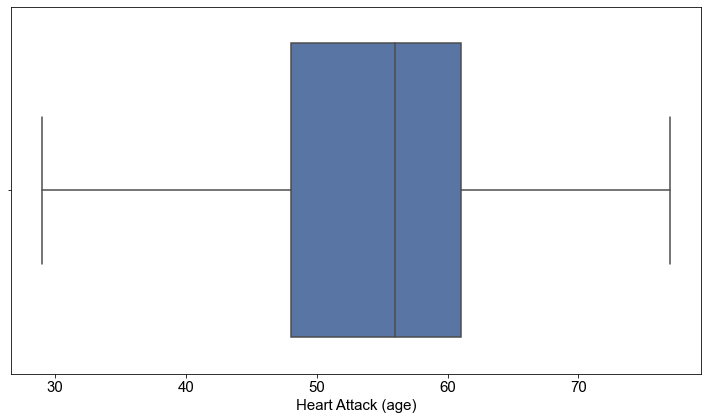

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(10, 6)
sns.set(style="whitegrid")
ax = sns.boxplot(x=heart_attack['age'])
ax.set_xlabel('Heart Attack (age)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
fig.tight_layout()
#fig.savefig('boxplot_age.png')

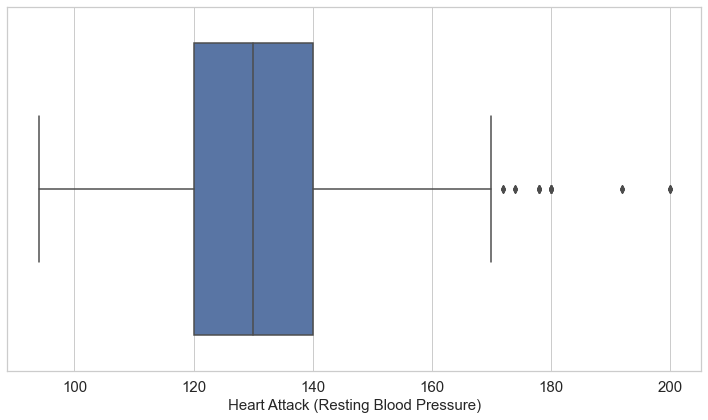

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(10, 6)
sns.set(style="whitegrid")
ax = sns.boxplot(x=heart_attack['trestbps'])
ax.set_xlabel('Heart Attack (Resting Blood Pressure)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
fig.tight_layout()
#fig.savefig('boxplot_trestbps.png')

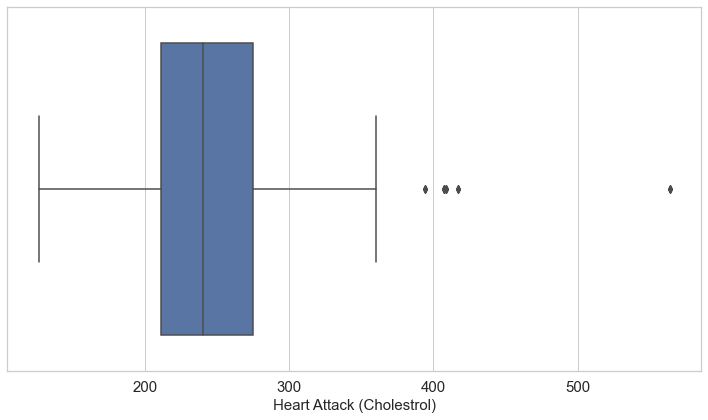

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(10, 6)
sns.set(style="whitegrid")
ax = sns.boxplot(x=heart_attack['chol'])
ax.set_xlabel('Heart Attack (Cholestrol)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
fig.tight_layout()
#fig.savefig('boxplot_chol.png')

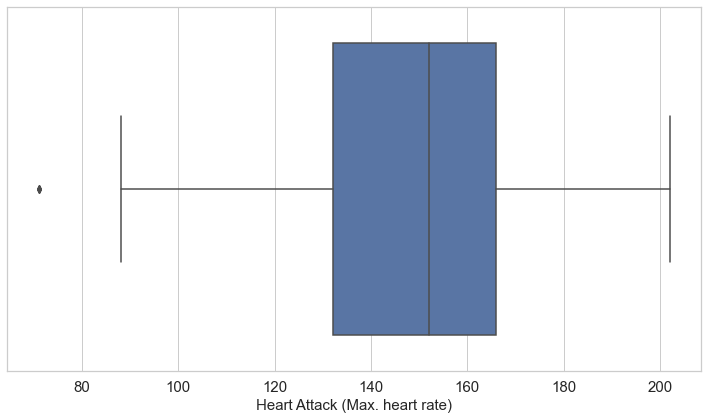

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(10, 6)
sns.set(style="whitegrid")
ax = sns.boxplot(x=heart_attack['thalach'])
ax.set_xlabel('Heart Attack (Max. heart rate)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
fig.tight_layout()
#fig.savefig('boxplot_heart_rate.png')

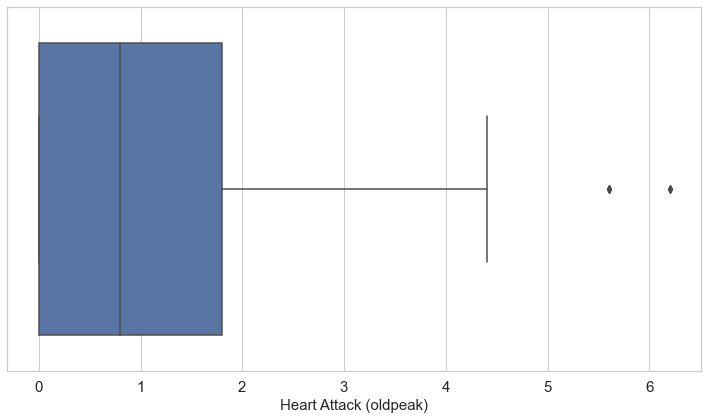

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(10, 6)
sns.set(style="whitegrid")
ax = sns.boxplot(x=heart_attack['oldpeak'])
ax.set_xlabel('Heart Attack (oldpeak)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
fig.tight_layout()
#fig.savefig('boxplot_oldpeak.png')

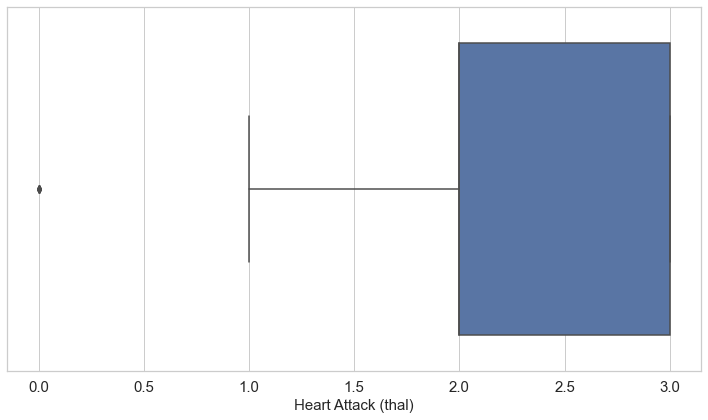

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(10, 6)
sns.set(style="whitegrid")
ax = sns.boxplot(x=heart_attack['thal'])
ax.set_xlabel('Heart Attack (thal)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
fig.tight_layout()
#fig.savefig('boxplot_thal.png')

In [17]:
# Displaying all statistics in a boxplot
import plotly.graph_objects as go
from plotly.offline import iplot, init_notebook_mode
fig = go.Figure()
fig.add_box(x=heart_attack['age'], text=heart_attack['age'])
iplot(fig)

In [18]:
fig = go.Figure()
fig.add_box(x=heart_attack['trestbps'], text=heart_attack['trestbps'])
iplot(fig)

In [19]:
fig = go.Figure()
fig.add_box(x=heart_attack['chol'], text=heart_attack['chol'])
iplot(fig)

In [20]:
fig = go.Figure()
fig.add_box(x=heart_attack['thalach'], text=heart_attack['thalach'])
iplot(fig)

In [21]:
fig = go.Figure()
fig.add_box(x=heart_attack['oldpeak'], text=heart_attack['oldpeak'])
iplot(fig)

In [22]:
fig = go.Figure()
fig.add_box(x=heart_attack['thal'], text=heart_attack['thal'])
iplot(fig)

<h1>Removing Outliers using Mean Imputaion<h1>

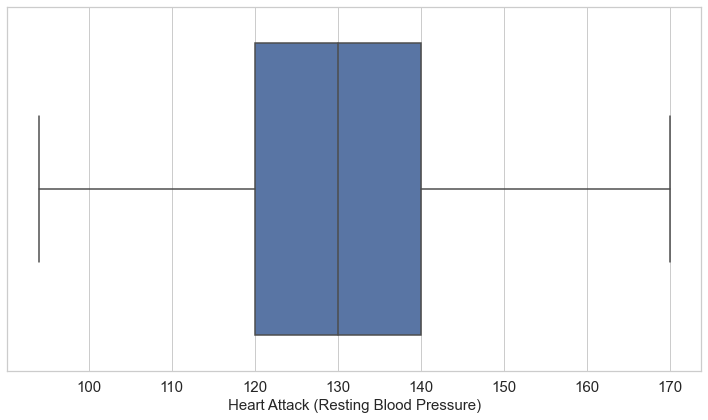

In [23]:
for i in heart_attack['trestbps']:
    q1 = heart_attack['trestbps'].quantile(0.25)
    q3 = heart_attack['trestbps'].quantile(0.75)
    IQR = q3-q1
    lower_fence = q1-1.5*IQR
    upper_fence = q3+1.5*IQR
    
    if i > upper_fence or i < lower_fence:
        heart_attack['trestbps'] = heart_attack['trestbps'].replace(i, np.mean(heart_attack['trestbps']))

# Plotting the result
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(10, 6)
ax = sns.boxplot(x=heart_attack['trestbps'])
ax.set_xlabel('Heart Attack (Resting Blood Pressure)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
fig.tight_layout()
#fig.savefig('boxplot_cleaning_outlier_trestbps.png')

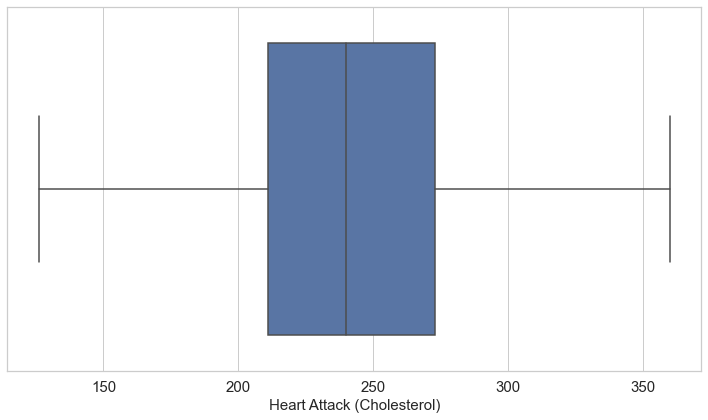

In [24]:
for i in heart_attack['chol']:
    q1 = heart_attack['chol'].quantile(0.25)
    q3 = heart_attack['chol'].quantile(0.75)
    IQR = q3-q1
    lower_fence = q1-1.5*IQR
    upper_fence = q3+1.5*IQR
    
    if i > upper_fence or i < lower_fence:
        heart_attack['chol'] = heart_attack['chol'].replace(i, np.mean(heart_attack['chol']))

# Plotting the result
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(10, 6)
ax = sns.boxplot(x=heart_attack['chol'])
ax.set_xlabel('Heart Attack (Cholesterol)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
fig.tight_layout()
#fig.savefig('boxplot_cleaning_outlier_chol.png')

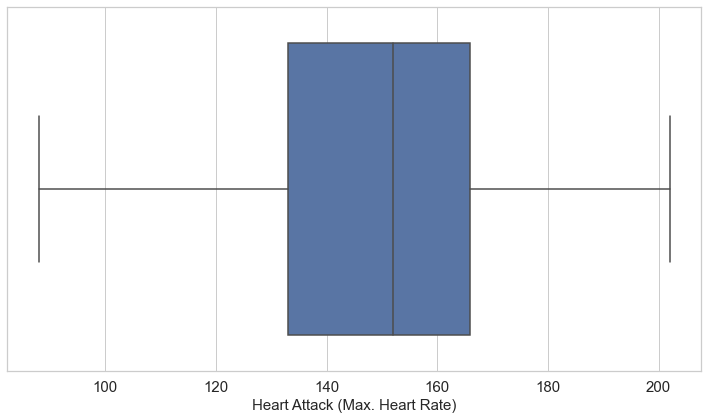

In [25]:
for i in heart_attack['thalach']:
    q1 = heart_attack['thalach'].quantile(0.25)
    q3 = heart_attack['thalach'].quantile(0.75)
    IQR = q3-q1
    lower_fence = q1-1.5*IQR
    upper_fence = q3+1.5*IQR
    
    if i > upper_fence or i < lower_fence:
        heart_attack['thalach'] = heart_attack['thalach'].replace(i, np.mean(heart_attack['thalach']))

# Plotting the result
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(10, 6)
ax = sns.boxplot(x=heart_attack['thalach'])
ax.set_xlabel('Heart Attack (Max. Heart Rate)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
fig.tight_layout()
#fig.savefig('boxplot_cleaning_outlier_thalach.png')

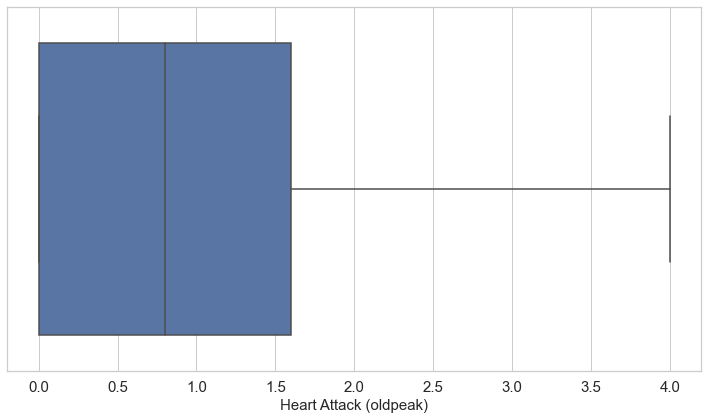

In [26]:
for i in heart_attack['oldpeak']:
    q1 = heart_attack['oldpeak'].quantile(0.25)
    q3 = heart_attack['oldpeak'].quantile(0.75)
    IQR = q3-q1
    lower_fence = q1-1.5*IQR
    upper_fence = q3+1.5*IQR
    
    if i > upper_fence or i < lower_fence:
        heart_attack['oldpeak'] = heart_attack['oldpeak'].replace(i, np.mean(heart_attack['oldpeak']))

# Plotting the result
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(10, 6)
ax = sns.boxplot(x=heart_attack['oldpeak'])
ax.set_xlabel('Heart Attack (oldpeak)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
fig.tight_layout()
#fig.savefig('boxplot_cleaning_outlier_oldpeak.png')

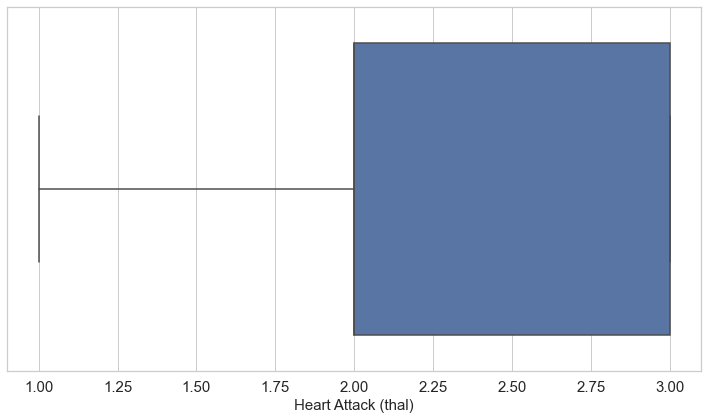

In [28]:
for i in heart_attack['thal']:
    q1 = heart_attack['thal'].quantile(0.25)
    q3 = heart_attack['thal'].quantile(0.75)
    IQR = q3-q1
    lower_fence = q1-1.5*IQR
    upper_fence = q3+1.5*IQR
    
    if i > upper_fence or i < lower_fence:
        heart_attack['thal'] = heart_attack['thal'].replace(i, np.mean(heart_attack['thal']))

# Plotting the result
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(10, 6)
ax = sns.boxplot(x=heart_attack['thal'])
ax.set_xlabel('Heart Attack (thal)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
fig.tight_layout()
#fig.savefig('boxplot_cleaning_outlier_thal.png')

<h1>Plotting the Count of the Categorical Columns</h1>

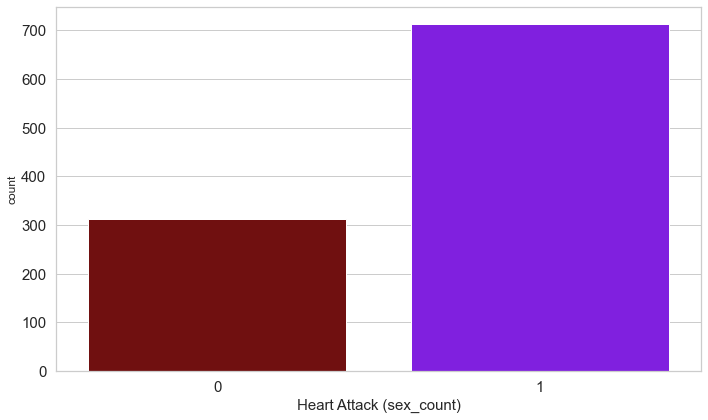

In [29]:
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(10, 6)
gs = fig.add_gridspec(3,3) 
ax = sns.countplot(x=heart_attack['sex'], palette=color_palette)
ax.set_xlabel('Heart Attack (sex_count)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
fig.tight_layout()
#fig.savefig('countplot_sex.png')

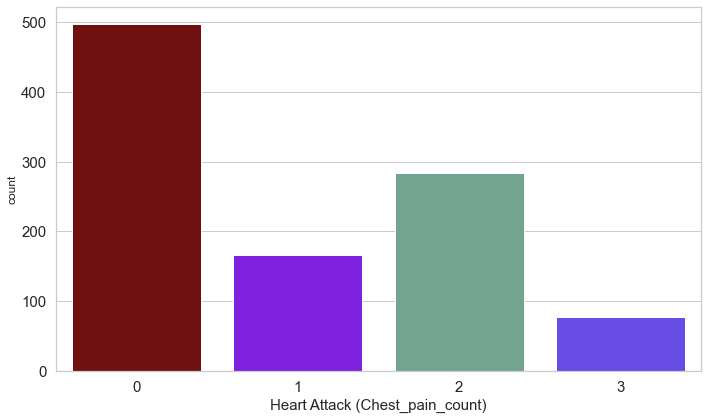

In [30]:
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(10, 6)
gs = fig.add_gridspec(3,3) 
ax = sns.countplot(x=heart_attack['cp'], palette=color_palette)
ax.set_xlabel('Heart Attack (Chest_pain_count)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
fig.tight_layout()
#fig.savefig('countplot_cp.png')

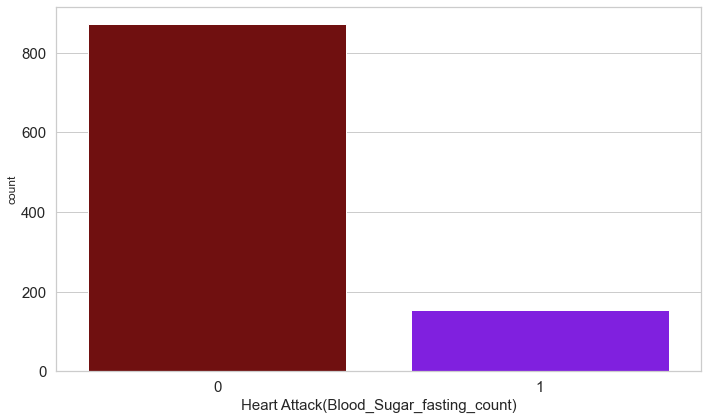

In [31]:
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(10, 6)
gs = fig.add_gridspec(3,3) 
ax = sns.countplot(x=heart_attack['fbs'], palette=color_palette)
ax.set_xlabel('Heart Attack(Blood_Sugar_fasting_count)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
fig.tight_layout()
#fig.savefig('countplot_fbs.png')

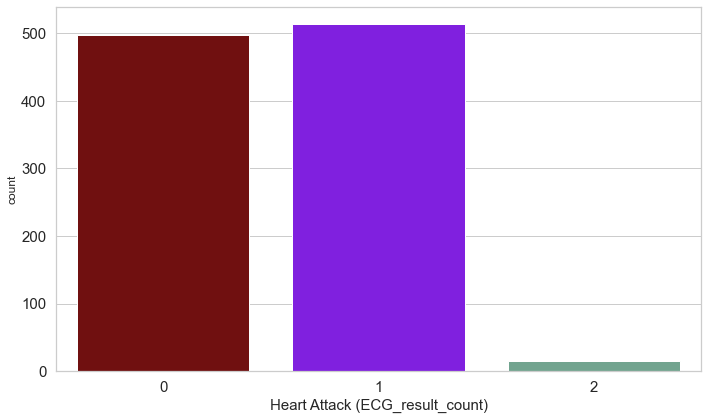

In [32]:
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(10, 6)
gs = fig.add_gridspec(3,3) 
ax = sns.countplot(x=heart_attack['restecg'], palette=color_palette)
ax.set_xlabel('Heart Attack (ECG_result_count)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
fig.tight_layout()
#fig.savefig('countplot_restecg.png')

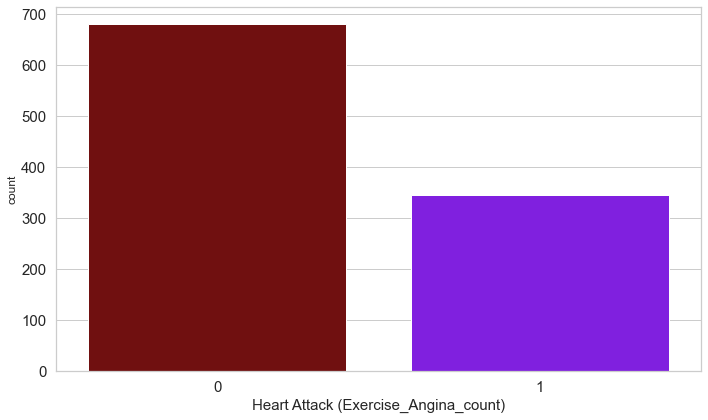

In [33]:
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(10, 6)
gs = fig.add_gridspec(3,3) 
ax = sns.countplot(x=heart_attack['exang'], palette=color_palette)
ax.set_xlabel('Heart Attack (Exercise_Angina_count)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
fig.tight_layout()
#fig.savefig('countplot_exang.png')

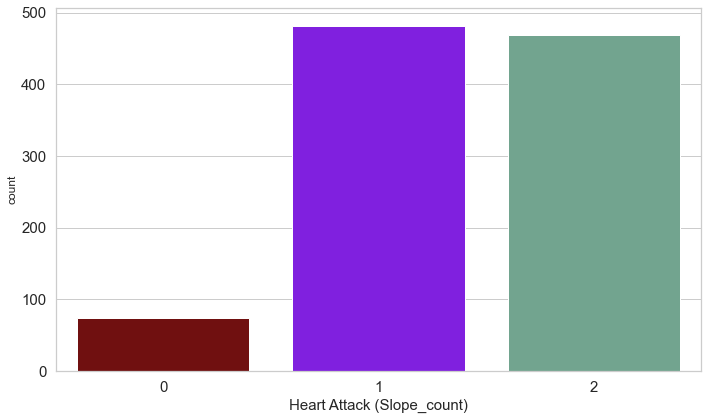

In [34]:
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(10, 6)
gs = fig.add_gridspec(3,3) 
ax = sns.countplot(x=heart_attack['slope'], palette=color_palette)
ax.set_xlabel('Heart Attack (Slope_count)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
fig.tight_layout()
#fig.savefig('countplot_slope.png')

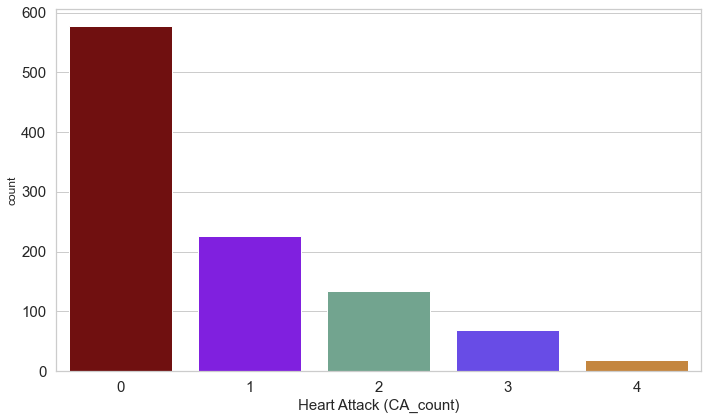

In [35]:
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(10, 6)
gs = fig.add_gridspec(3,3) 
ax = sns.countplot(x=heart_attack['ca'], palette=color_palette)
ax.set_xlabel('Heart Attack (CA_count)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
fig.tight_layout()
#fig.savefig('countplot_ca.png')

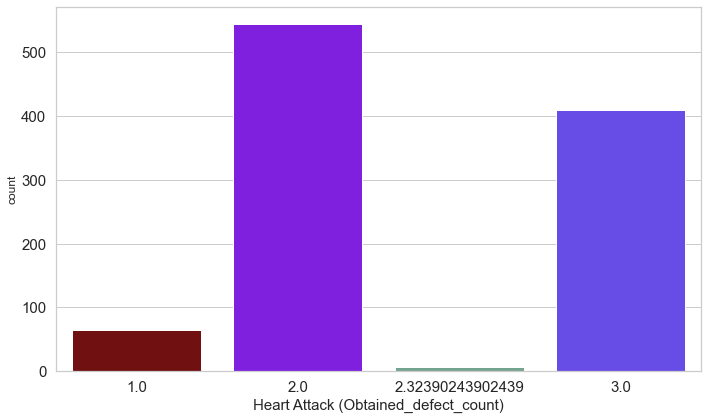

In [36]:
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(10, 6)
gs = fig.add_gridspec(3,3) 
ax = sns.countplot(x=heart_attack['thal'], palette=color_palette)
ax.set_xlabel('Heart Attack (Obtained_defect_count)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
fig.tight_layout()
#fig.savefig('countplot_thal.png')

<h1>Plotting the count of the target column</h1>

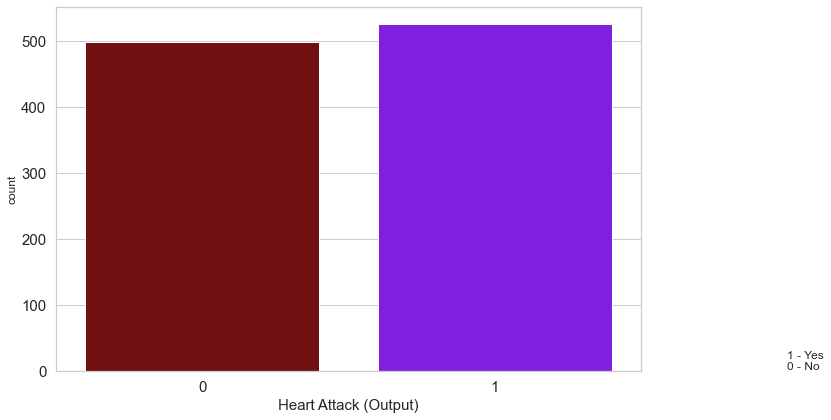

In [37]:
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(12, 6)
ax = sns.countplot(x=heart_attack['target'], palette=color_palette)
ax.set_xlabel('Heart Attack (Output)', fontsize=15)
ax.text(2, 2, "1 - Yes\n0 - No")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
fig.tight_layout()
#fig.savefig('countplot_restecg.png')

<h1>Correlation matrix of the continous variables</h1>

In [38]:
cont_corr = heart_attack[cont_col].corr().transpose()
cont_corr

age  trestbps      chol   thalach   oldpeak
age       1.000000  0.265164  0.186841 -0.380558  0.212314
trestbps  0.265164  1.000000  0.092306 -0.060896  0.135632
chol      0.186841  0.092306  1.000000 -0.048201  0.024276
thalach  -0.380558 -0.060896 -0.048201  1.000000 -0.349564
oldpeak   0.212314  0.135632  0.024276 -0.349564  1.000000

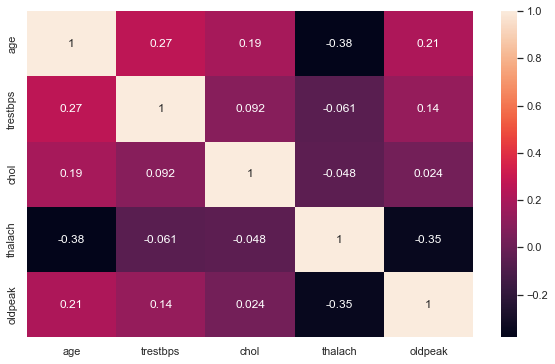

In [39]:
# Plotting the correlation 

color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig = plt.figure(figsize=(10,6))
ax.text(1.5, -0.1, "Correlation Matrix",fontsize=22)
sns.heatmap(cont_corr,annot=True)
fig.savefig('corr_plot.png')
plt.show()

<h1>Distribution of Continuous Variables with the output</h1>

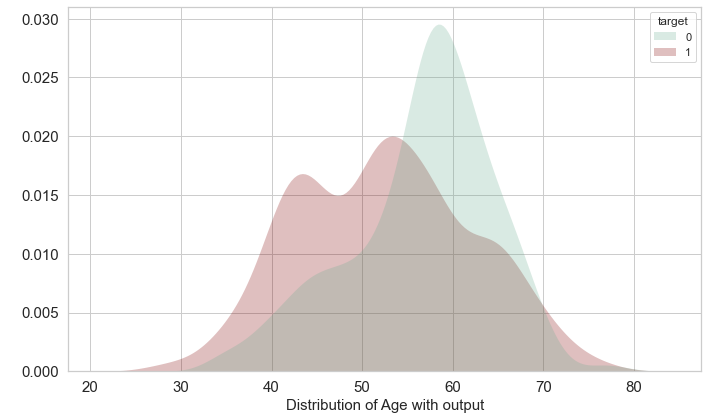

In [40]:
# Distribution of age with output

color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig = plt.figure(figsize=(10,6))
ax = sns.kdeplot(x=heart_attack['age'], hue='target', data=heart_attack, palette=["#6aac90","#800000"], fill=True,
                linewidth=0)
ax.set_xlabel('Distribution of Age with output', fontsize=15)
ax.set_ylabel(" ")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
fig.tight_layout()
#fig.savefig('distr_age.png')

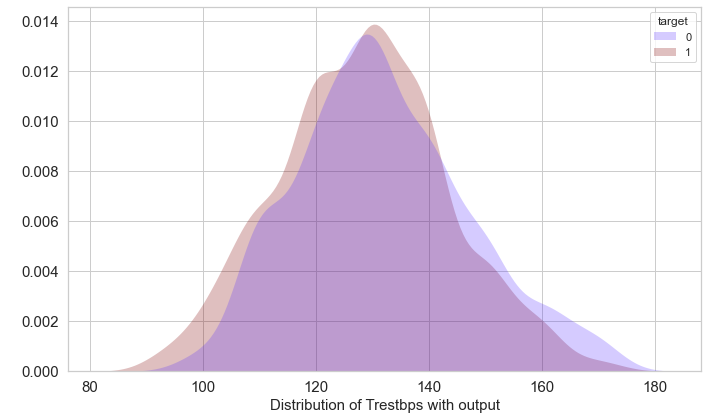

In [41]:
# Distribution of trestbps with output
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig = plt.figure(figsize=(10,6))
ax = sns.kdeplot(x=heart_attack['trestbps'], hue='target', data=heart_attack, palette=["#5833ff","#800000"], fill=True,
                linewidth=0)
ax.set_xlabel('Distribution of Trestbps with output', fontsize=15)
ax.set_ylabel(" ")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
fig.tight_layout()
#fig.savefig('distr_trestbps.png')

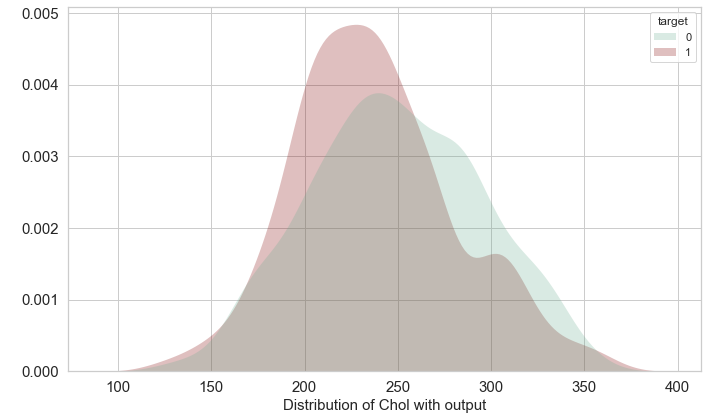

In [42]:
# Distribution of chol with output
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig = plt.figure(figsize=(10,6))
ax = sns.kdeplot(x=heart_attack['chol'], hue='target', data=heart_attack, palette=["#6aac90","#800000"], fill=True,
                linewidth=0)
ax.set_xlabel('Distribution of Chol with output', fontsize=15)
ax.set_ylabel(" ")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
fig.tight_layout()
#fig.savefig('distr_chol.png')

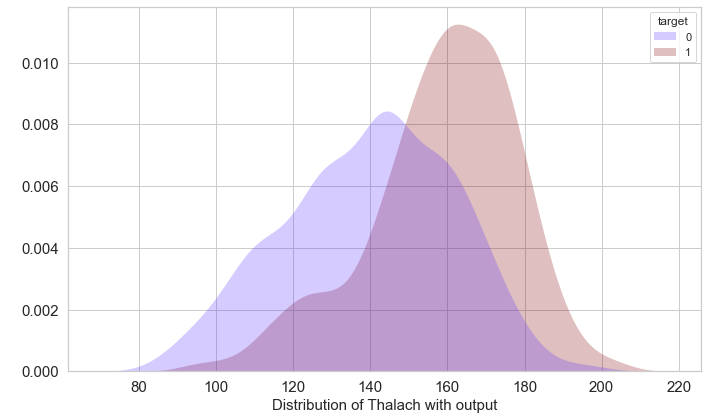

In [43]:
# Distribution of thalach with output
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig = plt.figure(figsize=(10,6))
ax = sns.kdeplot(x=heart_attack['thalach'], hue='target', data=heart_attack, palette=["#5833ff","#800000"], fill=True,
                linewidth=0)
ax.set_xlabel('Distribution of Thalach with output', fontsize=15)
ax.set_ylabel(" ")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
fig.tight_layout()
#fig.savefig('distr_thalach.png')

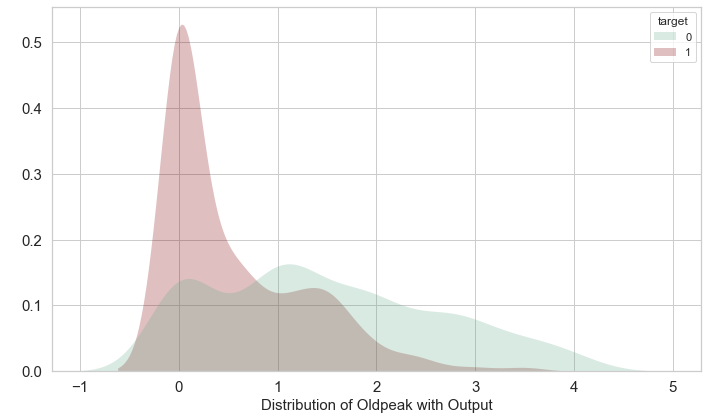

In [44]:
# Distribution of oldpeak with output
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig = plt.figure(figsize=(10,6))
ax = sns.kdeplot(x=heart_attack['oldpeak'], hue='target', data=heart_attack, palette=["#6aac90","#800000"], fill=True,
                linewidth=0)
ax.set_xlabel('Distribution of Oldpeak with Output', fontsize=15)
ax.set_ylabel(" ")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
fig.tight_layout()
#fig.savefig('distr_oldpeak.png')

<h1>Distribution of Categorical Variables with Output</h1>

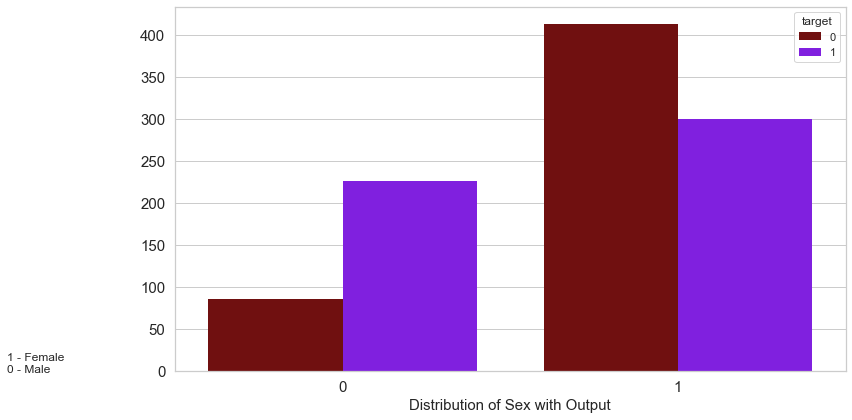

In [45]:
# Distribution of Sex with output

color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig = plt.figure(figsize=(12,6))
ax = sns.countplot(x=heart_attack['sex'], hue='target', data=heart_attack, palette=color_palette, fill=True,
                linewidth=0)
ax.set_xlabel('Distribution of Sex with Output', fontsize=15)
ax.set_ylabel(" ")
ax.text(-1, -1, "1 - Female\n0 - Male")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
fig.tight_layout()
#fig.savefig('distr_sex.png')

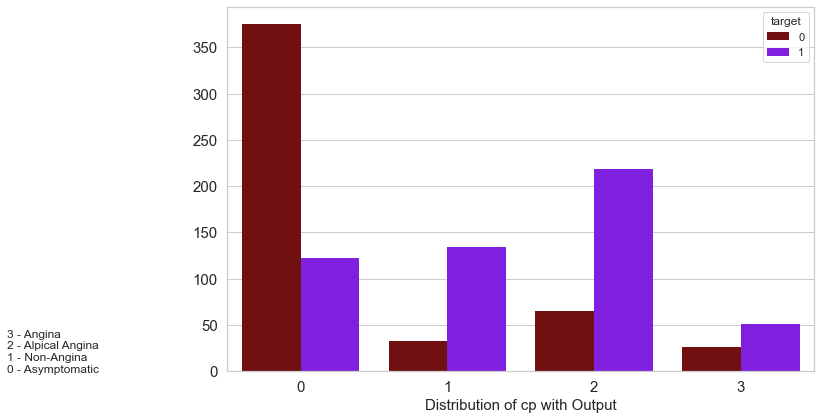

In [46]:
# Distribution of cp with output
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig = plt.figure(figsize=(12,6))
ax = sns.countplot(x=heart_attack['cp'], hue='target', data=heart_attack, palette=color_palette, fill=True,
                linewidth=0)
ax.set_xlabel('Distribution of cp with Output', fontsize=15)
ax.set_ylabel(" ")
ax.text(-2, -1, "3 - Angina\n2 - Alpical Angina\n1 - Non-Angina\n0 - Asymptomatic")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
fig.tight_layout()
#fig.savefig('distr_cp.png')

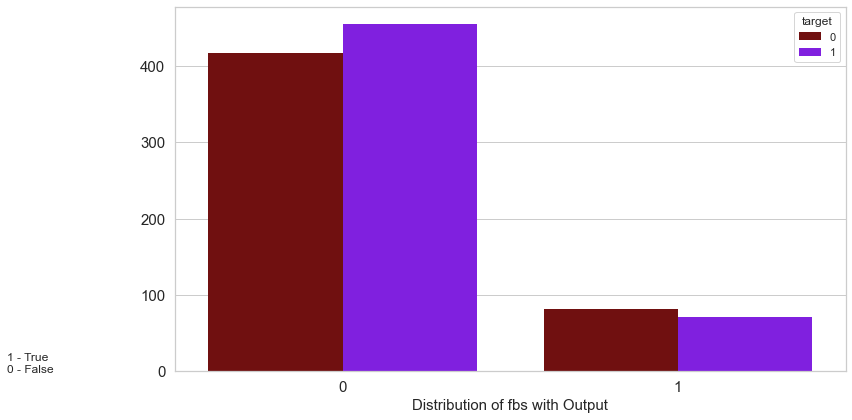

In [47]:
# Distribution of fbs with output
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig = plt.figure(figsize=(12,6))
ax = sns.countplot(x=heart_attack['fbs'], hue='target', data=heart_attack, palette=color_palette, fill=True,
                linewidth=0)
ax.set_xlabel('Distribution of fbs with Output', fontsize=15)
ax.set_ylabel(" ")
ax.text(-1, -1, "1 - True\n0 - False")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
fig.tight_layout()
#fig.savefig('distr_fbs.png')

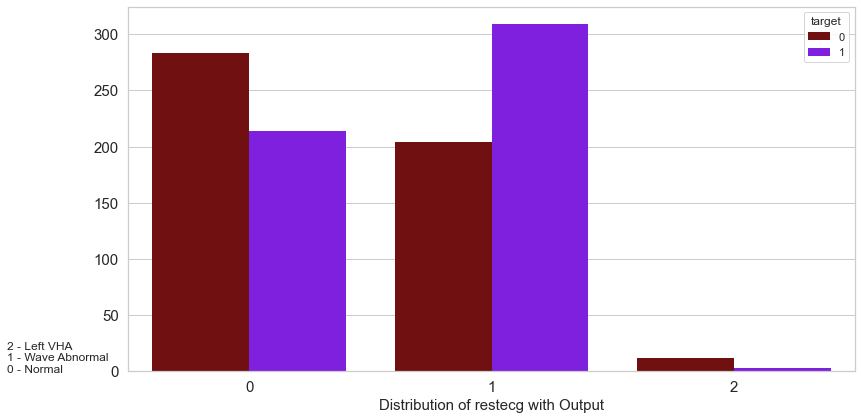

In [48]:
# Distribution of fbs with output
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig = plt.figure(figsize=(12,6))
ax = sns.countplot(x=heart_attack['restecg'], hue='target', data=heart_attack, palette=color_palette, fill=True,
                linewidth=0)
ax.set_xlabel('Distribution of restecg with Output', fontsize=15)
ax.set_ylabel(" ")
ax.text(-1, -1, "2 - Left VHA\n1 - Wave Abnormal\n0 - Normal")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
fig.tight_layout()
#fig.savefig('distr_restecg.png')

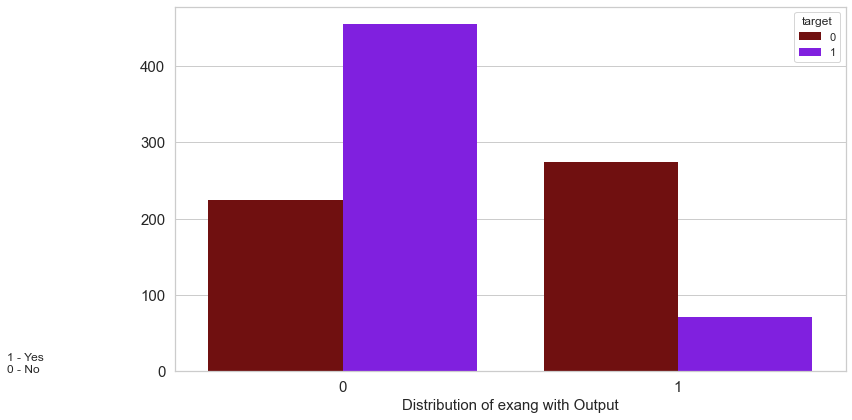

In [49]:
# Distribution of fbs with output
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig = plt.figure(figsize=(12,6))
ax = sns.countplot(x=heart_attack['exang'], hue='target', data=heart_attack, palette=color_palette, fill=True,
                linewidth=0)
ax.set_xlabel('Distribution of exang with Output', fontsize=15)
ax.set_ylabel(" ")
ax.text(-1, -1, "1 - Yes\n0 - No")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
fig.tight_layout()
#fig.savefig('distr_sex.png')

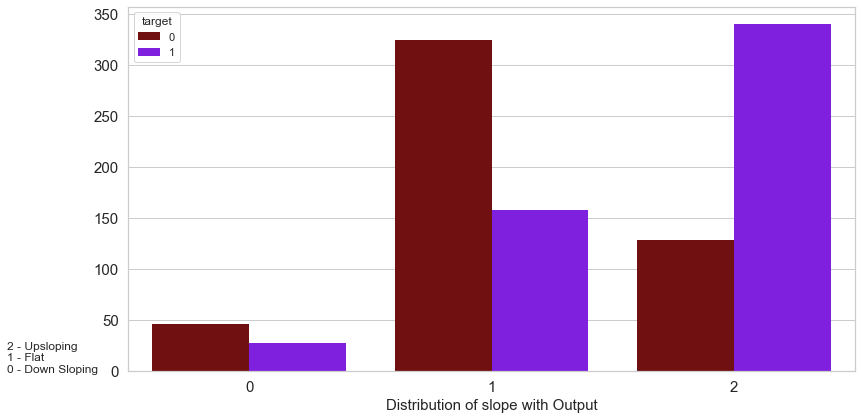

In [50]:
# Distribution of fbs with output
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig = plt.figure(figsize=(12,6))
ax = sns.countplot(x=heart_attack['slope'], hue='target', data=heart_attack, palette=color_palette, fill=True,
                linewidth=0)
ax.set_xlabel('Distribution of slope with Output', fontsize=15)
ax.set_ylabel(" ")
ax.text(-1, -1, "2 - Upsloping\n1 - Flat\n0 - Down Sloping")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
fig.tight_layout()
#fig.savefig('distr_sex.png')

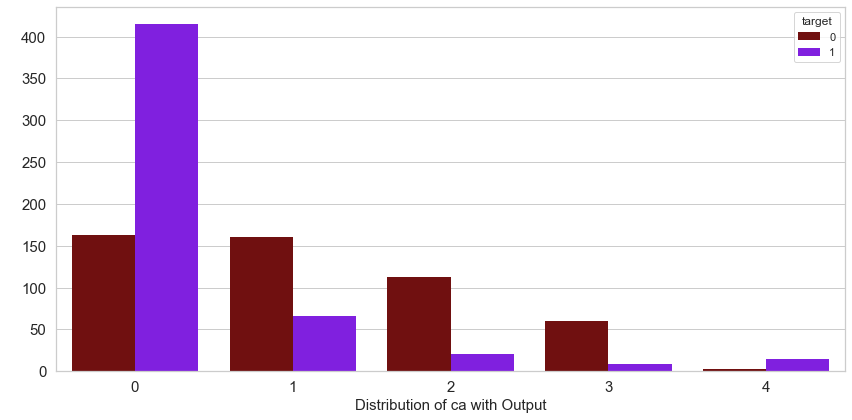

In [51]:
# Distribution of fbs with output
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig = plt.figure(figsize=(12,6))
ax = sns.countplot(x=heart_attack['ca'], hue='target', data=heart_attack, palette=color_palette, fill=True,
                linewidth=0)
ax.set_xlabel('Distribution of ca with Output', fontsize=15)
ax.set_ylabel(" ")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
fig.tight_layout()
#fig.savefig('distr_sex.png')

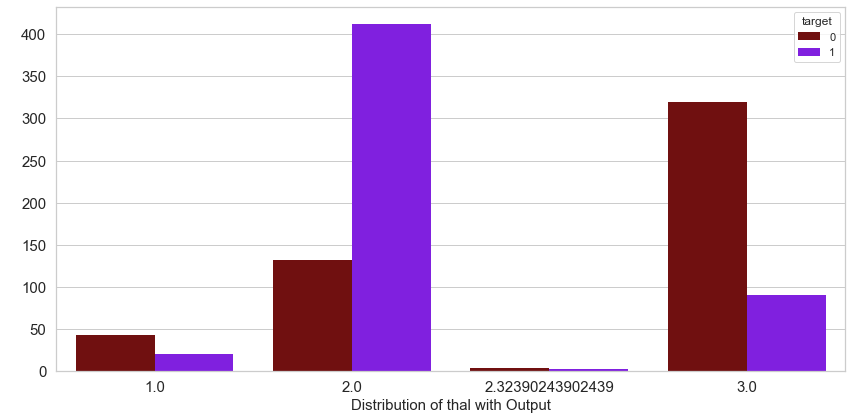

In [52]:
# Distribution of thal with output with replaced with the mean imputation
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig = plt.figure(figsize=(12,6))
ax = sns.countplot(x=heart_attack['thal'], hue='target', data=heart_attack, palette=color_palette, fill=True,
                linewidth=0)
ax.set_xlabel('Distribution of thal with Output', fontsize=15)
ax.set_ylabel(" ")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
fig.tight_layout()
#fig.savefig('distr_sex.png')

<h1>Pairplot with output</h1>

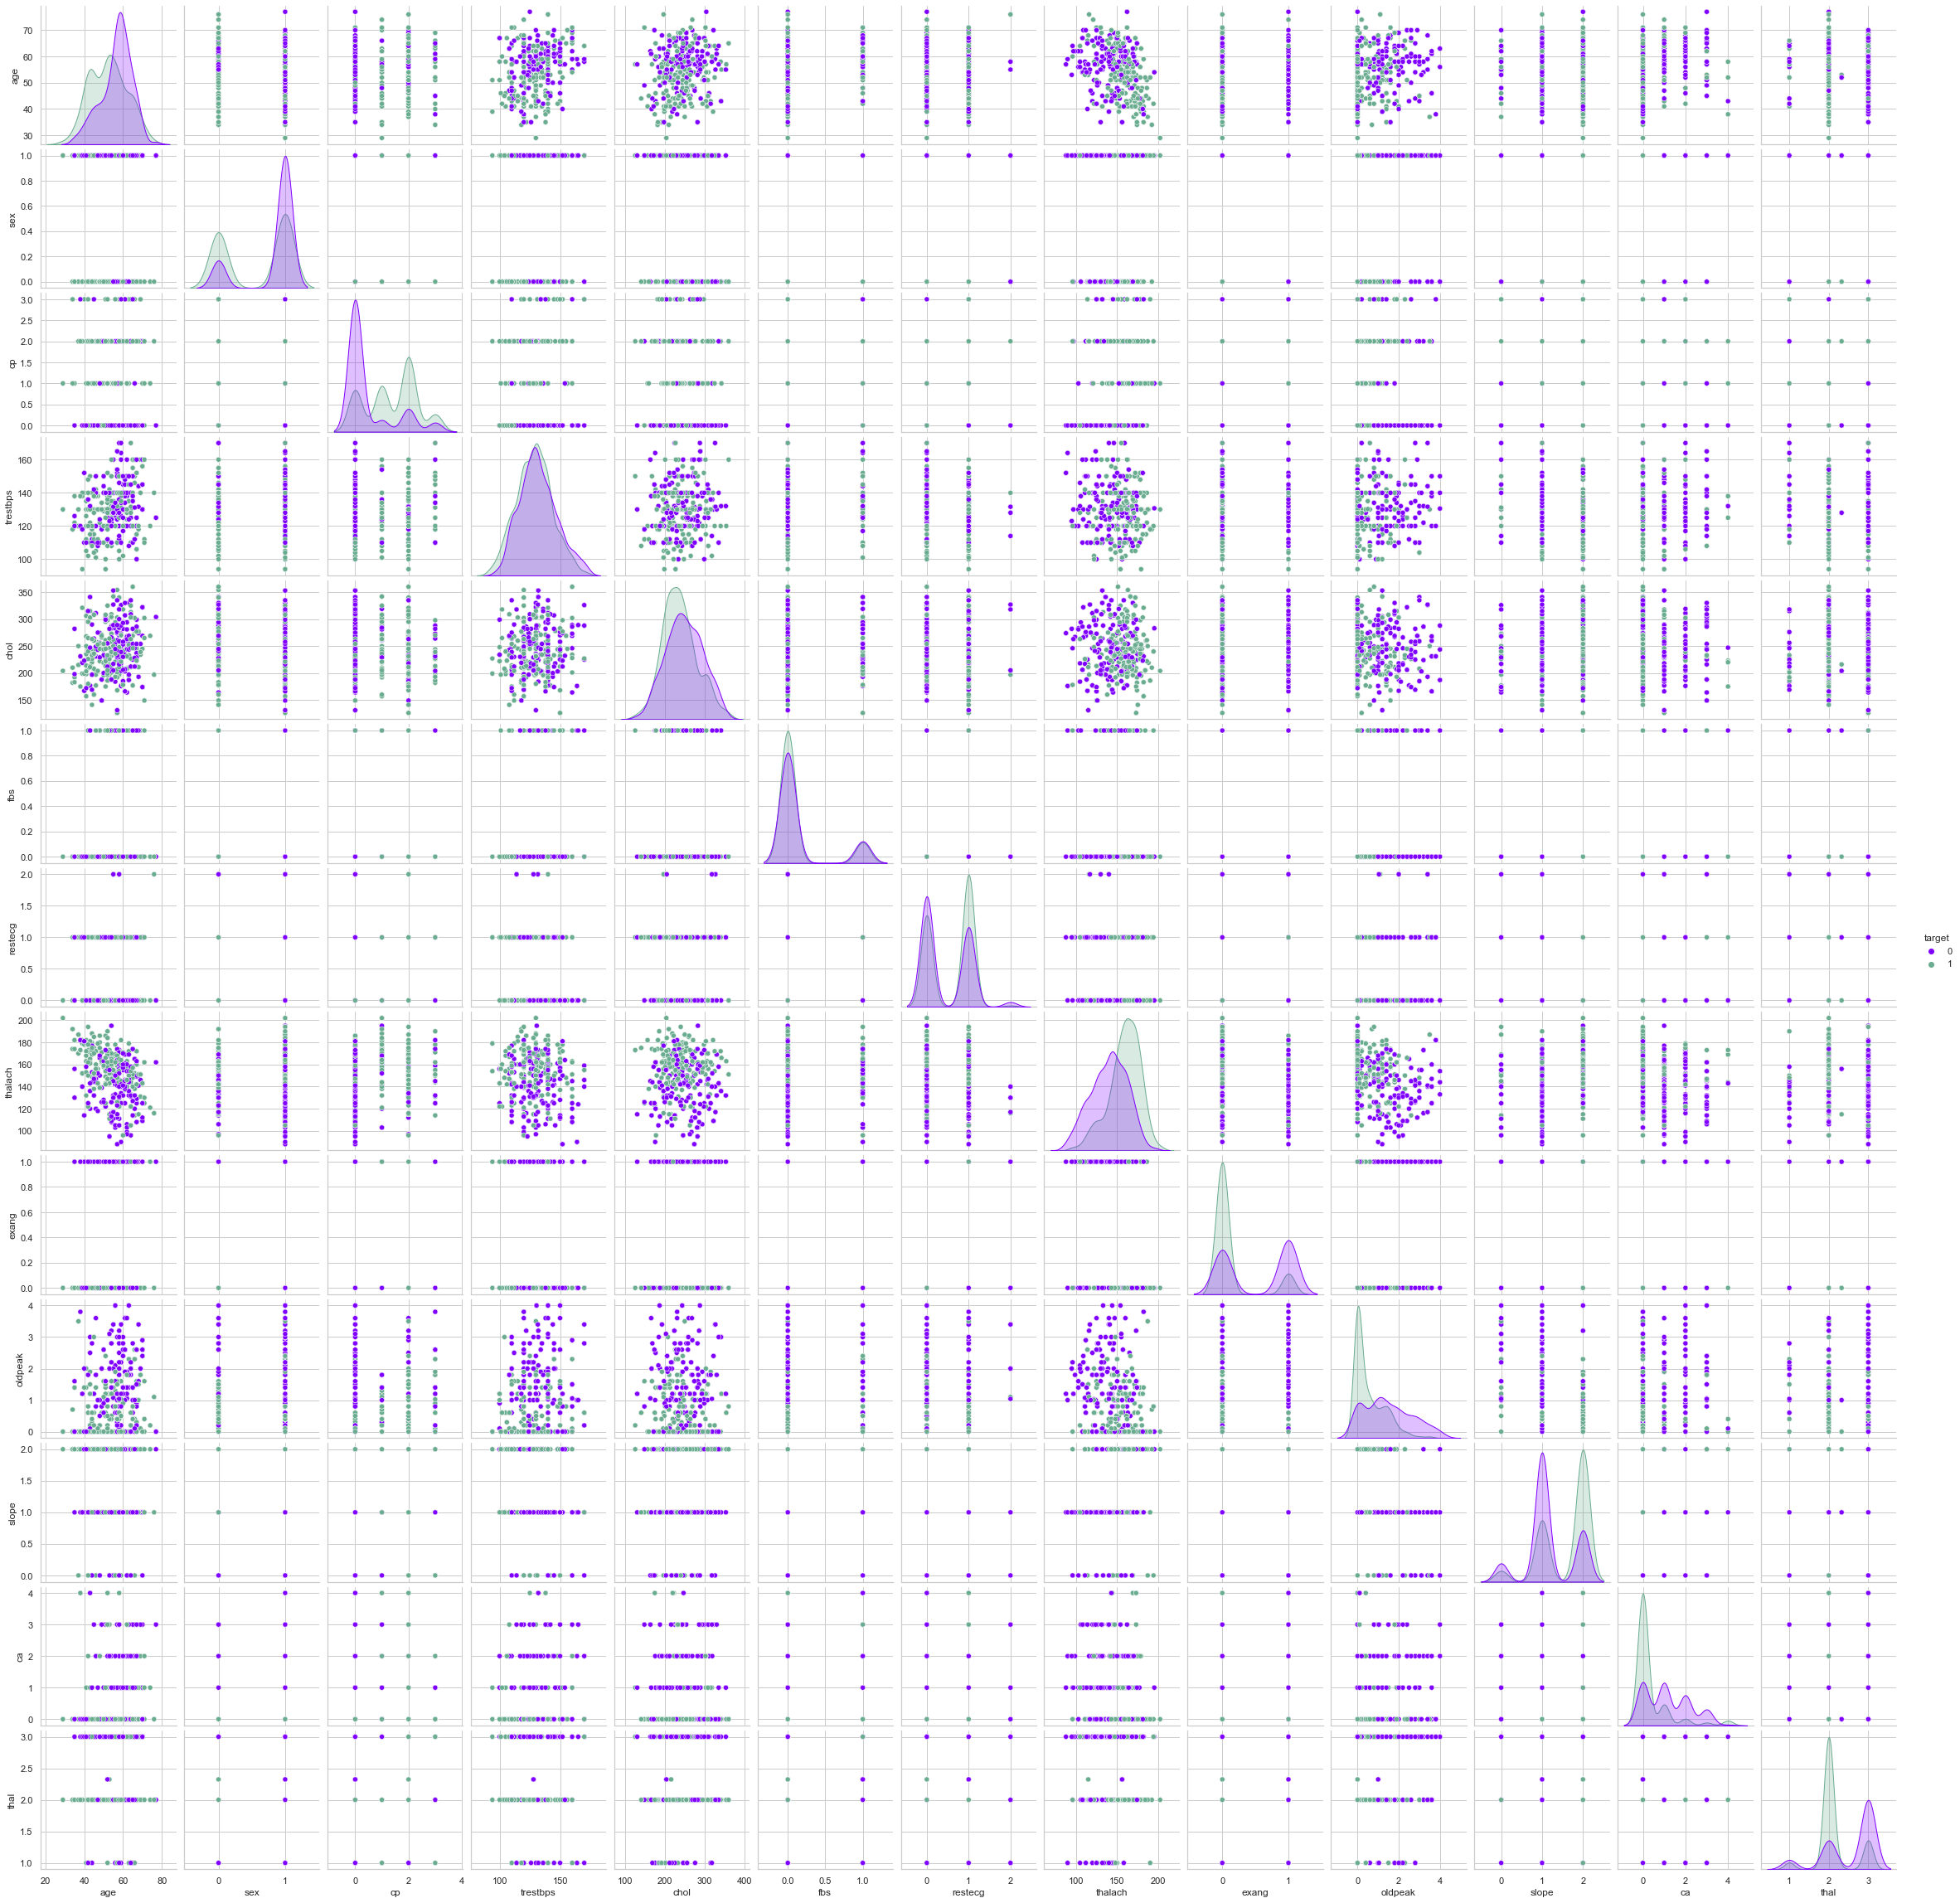

In [53]:
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
sns.pairplot(heart_attack, hue='target', palette=["#8000ff","#6aac90"])
fig.savefig('pairplot.png')
plt.show()

<h1>Packages for Modelling</h1>

In [54]:
# Train Test Split
from sklearn.model_selection import train_test_split

# Metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import matthews_corrcoef

# Scaling
from sklearn.preprocessing import StandardScaler

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

<h1>Creating Dummy Variables</h1>

In [55]:
cat_col = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
cont_col = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
output_col = ['target']

# Copy the original dataset
heart_attack_model = heart_attack

# Get the dummy variables for the categorical variables
heart_attack_model = pd.get_dummies(heart_attack_model, columns=cat_col, drop_first=True)

In [56]:
heart_attack_model.head()

age  trestbps   chol  thalach  oldpeak  target  sex_1  cp_1  cp_2  cp_3  \
0   52     125.0  212.0    168.0      1.0       0      1     0     0     0   
1   53     140.0  203.0    155.0      3.1       0      1     0     0     0   
2   70     145.0  174.0    125.0      2.6       0      1     0     0     0   
3   61     148.0  203.0    161.0      0.0       0      1     0     0     0   
4   62     138.0  294.0    106.0      1.9       0      0     0     0     0   

   ...  exang_1  slope_1  slope_2  ca_1  ca_2  ca_3  ca_4  thal_2.0  \
0  ...        0        0        1     0     1     0     0         0   
1  ...        1        0        0     0     0     0     0         0   
2  ...        1        0        0     0     0     0     0         0   
3  ...        0        0        1     1     0     0     0         0   
4  ...        0        1        0     0     0     1     0         1   

   thal_2.32390243902439  thal_3.0  
0                      0         1  
1                      0         1  
2                      0         1  
3                      0         1  
4                      0         0  

[5 rows x 23 columns]

<h1>Data Normalization/Standardization of the Continuous variables</h1>

In [57]:
# Standardize the continuous variables

scaler = StandardScaler()
heart_attack_model[cont_col] = scaler.fit_transform(heart_attack_model[cont_col])

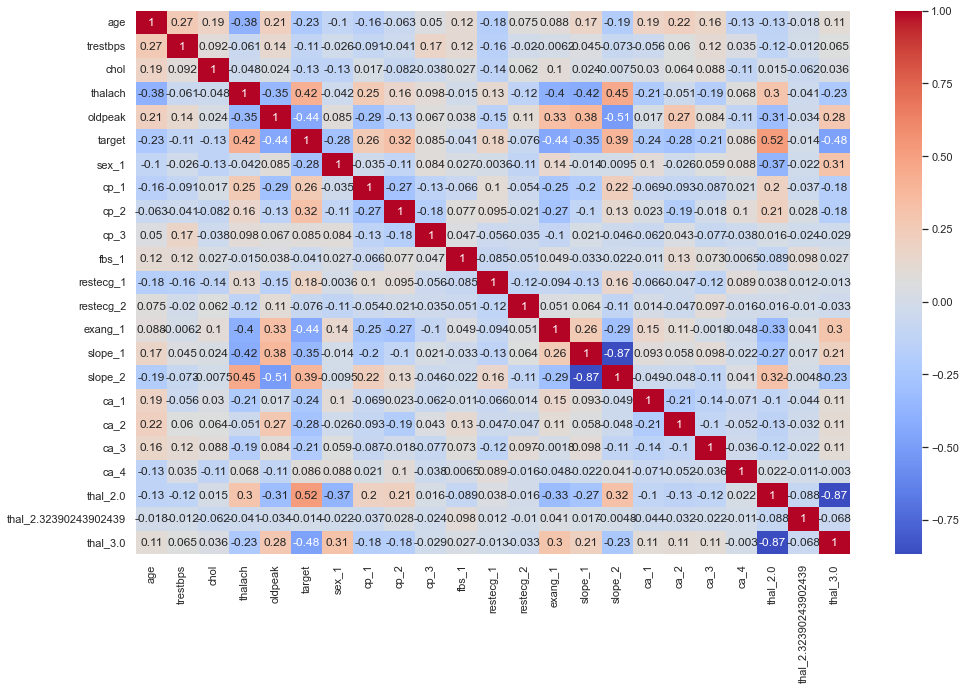

In [58]:
# Plotting the correlation coefficients

plt.figure(figsize = (16, 10))
sns.heatmap(heart_attack_model.corr(), annot = True, cmap="coolwarm")
plt.show()

<h1>Defining the Predictor variables X and the predicted variable y</h1>

In [59]:
X = heart_attack_model.drop(['target'], axis=1)
y = heart_attack_model['target']

In [60]:
print('Predictor:', X, sep='\n')
print('Predict:', y, sep='\n')

Predictor:
           age  trestbps      chol   thalach   oldpeak  sex_1  cp_1  cp_2  \
0    -0.268437 -0.339233 -0.688987  0.826974 -0.006696      1     0     0   
1    -0.158157  0.654535 -0.888952  0.248391  1.979627      1     0     0   
2     1.716595  0.985790 -1.533284 -1.086800  1.506693      1     0     0   
3     0.724079  1.184544 -0.888952  0.515429 -0.952565      1     0     0   
4     0.834359  0.522032  1.132918 -1.932422  0.844585      0     0     0   
...        ...       ...       ...       ...       ...    ...   ...   ...   
1020  0.503520  0.654535 -0.489022  0.648948 -0.952565      1     1     0   
1021  0.613800 -0.339233  0.333058 -0.374698  1.695867      1     0     0   
1022 -0.819834 -1.333000  0.710770 -1.398345 -0.006696      1     0     0   
1023 -0.488996 -1.333000  0.244184  0.426416 -0.952565      0     0     0   
1024 -0.047877 -0.670489 -1.222227 -1.620877  0.371651      1     0     0   

      cp_3  fbs_1  ...  exang_1  slope_1  slope_2  ca_1  ca_2  c

<h1>Splitting data into Train and Test data</h1>

In [61]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)


print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("shape of y_test:", y_test.shape)

Shape of X_train: (717, 22)
Shape of X_test: (308, 22)
Shape of y_train: (717,)
shape of y_test: (308,)


<h1>Train the model</h1>

# LOGISTIC REGRESSION

In [62]:
# Instantiate the model
model = LogisticRegression(solver='liblinear', multi_class='ovr', random_state=0)

# Fit the model
model.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', random_state=0, solver='liblinear')

In [63]:
# Calcuating probabilities
y_pred_proba = model.predict_proba(X_test)
y_pred_proba

array([[0.01888168, 0.98111832],
       [0.03314466, 0.96685534],
       [0.99445714, 0.00554286],
       [0.02356347, 0.97643653],
       [0.94803974, 0.05196026],
       [0.26732071, 0.73267929],
       [0.97003551, 0.02996449],
       [0.9954642 , 0.0045358 ],
       [0.17793558, 0.82206442],
       [0.87885297, 0.12114703],
       [0.07929917, 0.92070083],
       [0.99337801, 0.00662199],
       [0.09492027, 0.90507973],
       [0.15736087, 0.84263913],
       [0.97431914, 0.02568086],
       [0.21713704, 0.78286296],
       [0.99679169, 0.00320831],
       [0.01219425, 0.98780575],
       [0.07589859, 0.92410141],
       [0.99410679, 0.00589321],
       [0.42040044, 0.57959956],
       [0.96165135, 0.03834865],
       [0.47905254, 0.52094746],
       [0.99841443, 0.00158557],
       [0.42040044, 0.57959956],
       [0.00661875, 0.99338125],
       [0.01741006, 0.98258994],
       [0.0111328 , 0.9888672 ],
       [0.98320353, 0.01679647],
       [0.11116667, 0.88883333],
       [0.

In [64]:
# Predicting the test set
y_pred = model.predict(X_test)
print('Prediction:', y_pred, sep='\n')

Prediction:
[1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1
 0 1 1 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1 0 0 1 1 0 0 1
 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1
 1 1 0 1 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 1 0 1 1 0 1
 1 0 1 0 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 1 0 0 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 0 0 1 1 1 0 1 1 0 1 0 0 0 1 0 1 0 1 0
 0 1 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1 0
 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0 1
 1 0 0 1 1 0 1 1 1 0 0 1]


In [65]:
# Score
print('The score is:', model.score(X, y), sep='\n')

The score is:
0.8770731707317073


In [66]:
# Intercept
print('The incercept is:', model.intercept_, sep='\n')

The incercept is:
[1.1067177]


In [67]:
# Coefficient
print('The coefficient is:', model.coef_, sep='\n')

The coefficient is:
[[ 0.11749549 -0.19980381 -0.60771258  0.32485825 -0.64484433 -1.3478779
   1.03422359  1.70361197  1.91971491  0.17297148  0.232203   -0.23640645
  -0.4609464  -0.46485686  0.70312615 -1.95237596 -2.3197961  -1.66788432
   0.59760761  0.45957617 -0.63108796 -1.12359439]]


In [68]:
# performance metrics

print('The accuracy score is:', accuracy_score(y_test, y_pred), sep='\n')
print('The MCC score is:', matthews_corrcoef(y_test, y_pred), sep='\n')

The accuracy score is:
0.8344155844155844
The MCC score is:
0.6749318806298127


In [69]:
# Confusion matrix
print('The confusion matrix is:', confusion_matrix(y_test, y_pred), sep='\n')

The confusion matrix is:
[[124  35]
 [ 16 133]]


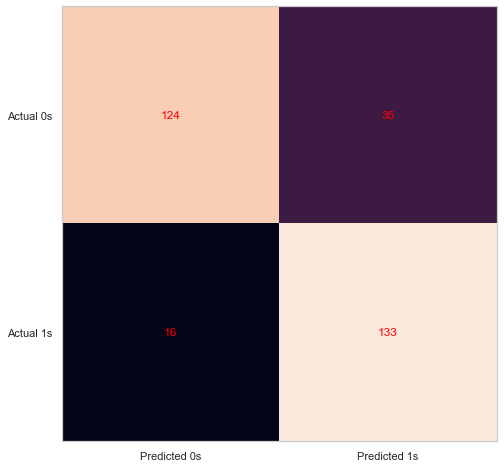

In [70]:
# Plotting the confusion matrix
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [71]:
# Classification
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.78      0.83       159
           1       0.79      0.89      0.84       149

    accuracy                           0.83       308
   macro avg       0.84      0.84      0.83       308
weighted avg       0.84      0.83      0.83       308



AUC: 0.8362458317504539


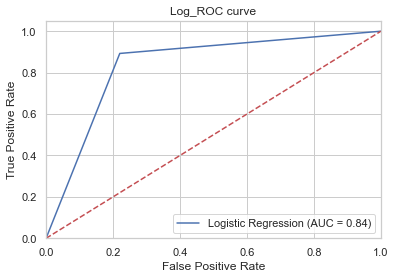

In [72]:
# Plotting ROC-AUC

model_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

print("AUC:", model_roc_auc)

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (AUC = %0.2f)' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Log_ROC curve')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# SUPPORT VECTOR MACHINE (SVM)

In [73]:
# Instantiating the model
svc_model = SVC(kernel='linear', random_state=42)

# Fit the model
svc_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [74]:
# predict the response
y_pred = svc_model.predict(X_test)

#confusion matrix for evaluation
cm = confusion_matrix(y_test, y_pred)
print("Confusion_Matrix:", cm, sep='\n')

# evaluate accuracy
print("Accuracy score of SVM is:", (accuracy_score(y_test, y_pred)))

#evaluate MCC
print('The MCC score is:', matthews_corrcoef(y_test, y_pred), sep='\n')

Confusion_Matrix:
[[122  37]
 [ 17 132]]
Accuracy score of SVM is: 0.8246753246753247
The MCC score is:
0.6559763906444717


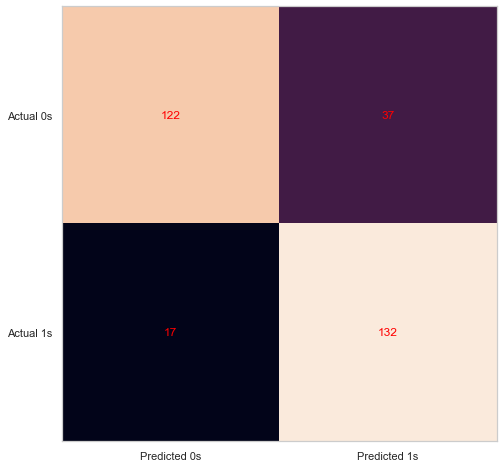

In [75]:
# Plotting the confusion matrix
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [76]:
# Classification
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82       159
           1       0.78      0.89      0.83       149

    accuracy                           0.82       308
   macro avg       0.83      0.83      0.82       308
weighted avg       0.83      0.82      0.82       308



AUC: 0.8266008188763667


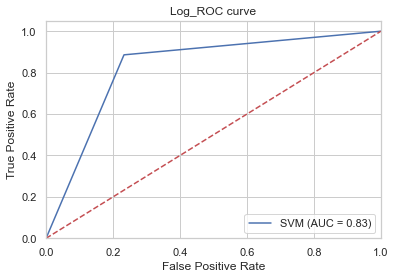

In [77]:
# Plotting ROC-AUC

model_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

print("AUC:", model_roc_auc)

plt.figure()
plt.plot(fpr, tpr, label='SVM (AUC = %0.2f)' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Log_ROC curve')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# SVC TUNING

In [78]:
# Define a range of hyperparameters to search over
param_grid = {
    'C': [0.1, 1, 10, 100], 
    'kernel': ['linear', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Create an instance of the SVC classifier
svc = SVC()

# Use GridSearchCV to search for the best combination of hyperparameters
svc_tuned = GridSearchCV(svc, param_grid, cv=5)

# Fit the tuned model on the training data
svc_tuned.fit(X_train, y_train)

# Predict on the test data using the tuned model
y_pred_tuned = svc_tuned.predict(X_test)

# Evaluate the tuned model using a confusion matrix and accuracy score
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
print("Confusion Matrix (tuned):", cm_tuned, sep='\n')

accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print("Accuracy score of SVM (tuned) is:", accuracy_tuned)

Confusion Matrix (tuned):
[[159   0]
 [  3 146]]
Accuracy score of SVM (tuned) is: 0.9902597402597403


# K-NEAREST NEIGHBOR

In [79]:
# Using K-Nearest Neighbour:

# instantiate the learning model (k=3)
knn = KNeighborsClassifier(n_neighbors=3)

# fitthe model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

#confusion matrix for evaluation
cm = confusion_matrix(y_test, y_pred)
print("Confusion_Matrix:", cm, sep='\n')

# evaluate accuracy
print("Accuracy score of KNN is:", (accuracy_score(y_test, y_pred)))

#evaluate MCC
print('The MCC score is:', matthews_corrcoef(y_test, y_pred), sep='\n')

Confusion_Matrix:
[[147  12]
 [ 10 139]]
Accuracy score of KNN is: 0.9285714285714286
The MCC score is:
0.8571248220324995


AUC: 0.9287071039635304


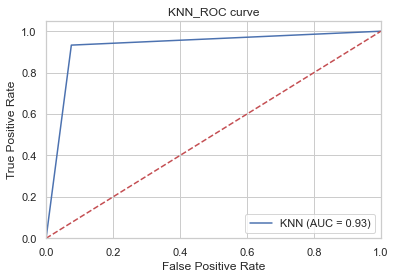

In [80]:
# Plotting ROC-AUC

model_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

print("AUC:", model_roc_auc)

plt.figure()
plt.plot(fpr, tpr, label='KNN (AUC = %0.2f)' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN_ROC curve')
plt.legend(loc="lower right")
#plt.savefig('KNN_ROC)
plt.show()

In [81]:
# Classification
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       159
           1       0.92      0.93      0.93       149

    accuracy                           0.93       308
   macro avg       0.93      0.93      0.93       308
weighted avg       0.93      0.93      0.93       308



# KNN TUNING 

In [82]:
#improving KNN performance in scikit-learn using GridSearchCV - step one

parameters = {'n_neighbors': [1, 100],
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters, cv=5)
gridsearch.fit(X_train, y_train)

print("Best param is:", gridsearch.best_params_)
print("Best Accuracy score is:", gridsearch.best_score_)

Best param is: {'metric': 'manhattan', 'n_neighbors': 100, 'weights': 'distance'}
Best Accuracy score is: 0.9362503272663574


# DECISION TREE CLASSIFIER

In [83]:
# Instantiate the Decision Tree classifier
dtc = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training set
dtc.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = dtc.predict(X_test)

# Evaluate the performance of the classifier
cm = confusion_matrix(y_test, y_pred)
print("Confusion_Matrix:", cm, sep='\n')

# evaluate accuracy
print("Accuracy score of DTC is:", (accuracy_score(y_test, y_pred)))

#evaluate MCC
print('The MCC score is:', matthews_corrcoef(y_test, y_pred), sep='\n')

Confusion_Matrix:
[[159   0]
 [  9 140]]
Accuracy score of DTC is: 0.9707792207792207
The MCC score is:
0.9430067576462233


AUC: 0.9697986577181208


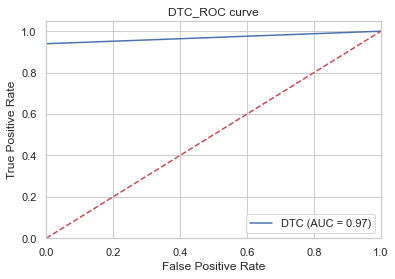

In [84]:
# Plotting ROC-AUC

model_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

print("AUC:", model_roc_auc)

plt.figure()
plt.plot(fpr, tpr, label='DTC (AUC = %0.2f)' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DTC_ROC curve')
plt.legend(loc="lower right")
#plt.savefig('DTC_ROC)
plt.show()

In [85]:
# Classification
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       159
           1       1.00      0.94      0.97       149

    accuracy                           0.97       308
   macro avg       0.97      0.97      0.97       308
weighted avg       0.97      0.97      0.97       308



# RANDOM FOREST CLASSIFIER

In [86]:
# instantiating the object
rfc = RandomForestClassifier()

# fitting the model
rfc.fit(X_train, y_train)

# calculating the predictions
y_pred = rfc.predict(X_test)

# Evaluate the performance of the classifier
cm = confusion_matrix(y_test, y_pred)
print("Confusion_Matrix:", cm, sep='\n')

# evaluate accuracy
print("Accuracy score of RFC is:", (accuracy_score(y_test, y_pred)))

#evaluate MCC
print('The MCC score is:', matthews_corrcoef(y_test, y_pred), sep='\n')

Confusion_Matrix:
[[159   0]
 [  3 146]]
Accuracy score of RFC is: 0.9902597402597403
The MCC score is:
0.9806732939012442


AUC: 0.9899328859060403


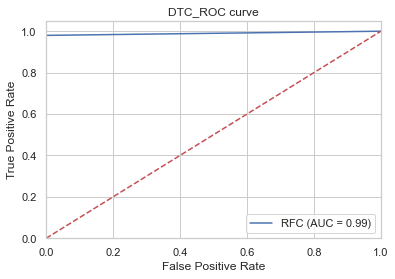

In [87]:
# Plotting ROC-AUC

model_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

print("AUC:", model_roc_auc)

plt.figure()
plt.plot(fpr, tpr, label='RFC (AUC = %0.2f)' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DTC_ROC curve')
plt.legend(loc="lower right")
#plt.savefig('DTC_ROC)
plt.show()

In [88]:
# Classification
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       159
           1       1.00      0.98      0.99       149

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308

